# **Markowitz Efficient Frontier**
---
 
- Copyright (c) Antoine Jacquier (QuantLearn Ltd), 2022. All rights reserved

- Author: Antoine Jacquier <Jack.QuantLearn@gmail.com>

- Platform: Tested on Windows 10 with Python 3.9

In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import seaborn as sns
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from random import sample
plt.style.use('fivethirtyeight')
import yfinance as yf  

Setting up the time frame and the list of tickers

In [2]:
start, end = '2017-01-01', '2018-01-01'
tickers = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

Select a few (random) tickers from the list (as many as you wish) and import the data from Yahoo Finance

In [4]:
nb_stocks = 5 ## Number of stocks to build the portfolio
tickers_indices = sample(range(len(tickers)), nb_stocks) ## select random indices (without repetition)
print("Tickers selected with their indices: ", [tickers[i] + "(" + str(i) + ")" for i in tickers_indices])

df = pd.DataFrame()

for ticker in [tickers[t] for t in tickers_indices]:
    dfTemp = yf.download(ticker, start, end)
    dfTemp = dfTemp.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
    dfTemp.columns=[ticker]
    df = pd.concat([df, dfTemp], axis=1)

Tickers selected with their indices:  ['VNO(477)', 'UDR(454)', 'QRVO(387)', 'O(394)', 'XLNX(498)']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,VNO,UDR,QRVO,O,XLNX
Date,,,,,
2017-01-03,84.656425,35.950001,52.900002,55.707363,59.070000
2017-01-04,87.000809,36.310001,54.509998,56.540699,58.639999
2017-01-05,86.903801,36.430000,53.360001,58.062016,57.930000
2017-01-06,86.750198,36.430000,53.860001,57.984497,59.049999
2017-01-09,85.739693,36.049999,54.369999,57.558140,59.060001


Plot the time series of the selected tickers

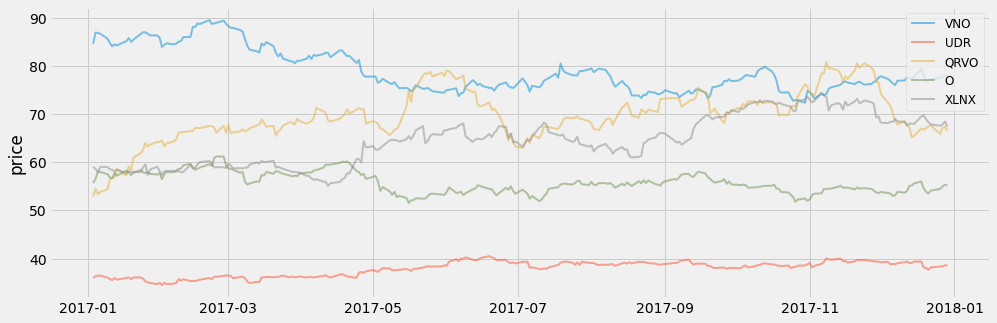

In [6]:
plt.figure(figsize=(15, 5))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=2, alpha=0.5,label=c)
plt.legend(loc='best', fontsize=12)
plt.ylabel('price')
plt.show()

In [7]:
returns = df.pct_change() ## Creates the vector of returns
returns = returns.dropna()

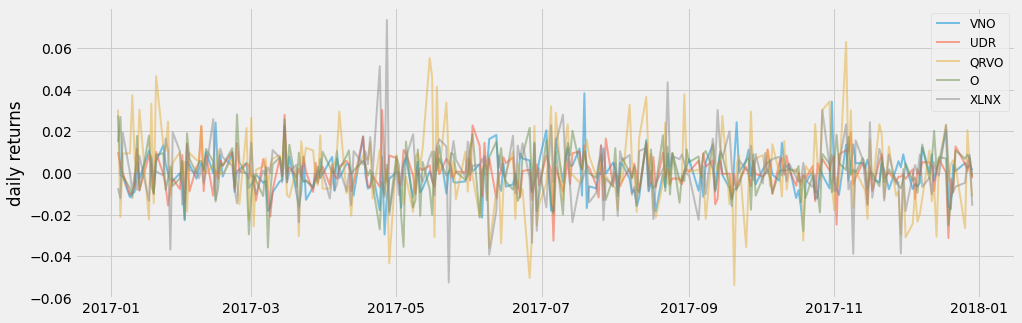

In [8]:
plt.figure(figsize=(15,5))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=2, alpha=0.5,label=c)
plt.legend(loc='best', fontsize=12)
plt.ylabel('daily returns')
plt.show()

## Portfolio optimisation and construction of the Markowitz frontier

In [9]:
def ptfMeanVar(ww, avgReturns, covMatrix):
    """
    ww: vector of weights
    avgReturns: vector of mean returns of the returns of the assets
    covMatrix: covariance matrix of the returns
    """
    ## returns mean and variance (normalised) of a given portfolio
    returns = np.sum(avgReturns*ww) * 252.
    std = np.sqrt(np.dot(ww.T, np.dot(covMatrix, ww))) * np.sqrt(252.)
    return std, returns
  
def randomPtf(nb_stocks, nbPtf, avgReturns, covMatrix, r): ## Generate random portfolios
    """
    nb_stocks: specify a number of stocks in the portfolio
    nbPtf: specify a number of portfolios to be generated
    avgReturns: vector of mean returns of the returns of the assets
    covMatrix: covariance matrix of the returns
    r: target return (to compute the Sharpe ratio)
    """
    output = np.zeros((3,nbPtf))
    www = []
    for i in range(nbPtf):
        ww = np.random.random(nb_stocks)
        ww /= np.sum(ww) ## make sure weights sum up to 1
        www.append(ww)
        std, returns = ptfMeanVar(ww, avgReturns, covMatrix)
        output[:,i] = std, returns, (returns - r) / std ## the third quantity is the Sharpe ratio
    return output, www
     ## for each i, www[i] is the vector of weights (positive and summing up to one) of the components of portfolio[i]
     ## for each i, output[i] returns (standard deviation, returns, Sharpe ratio) of portfolio[i]

In [10]:
def plotMarkowitz(df, avgReturns, covMatrix, nbPtf, r):
    """
    Create and plot the Markowitz frontier
    """
    nbStocks = len(df.columns)
    results, weights = randomPtf(nbStocks, nbPtf, avgReturns, covMatrix, r)
    
    max_sharpe_idx = np.argmax(results[2]) ## ID of the largest Sharpe ratio
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    maxSharpeAlloc = pd.DataFrame(100.*weights[max_sharpe_idx],index=df.columns,columns=['allocation']).T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    minSharpeAlloc = pd.DataFrame(100.*weights[min_vol_idx],index=df.columns,columns=['allocation']).T
    #minSharpeAlloc.allocation = [round(i*100,2)for i in minSharpeAlloc.allocation]
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='YlGnBu', marker='x', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='x',color='r',s=100, label='Max Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='o',color='k',s=100, alpha=0.8, label='Min volatility')
    
    def get_cmap(n, name='hsv'):
        return plt.cm.get_cmap(name, n)

    cmap = get_cmap(nbStocks)
    for i in range(nbStocks): ## Plot each individual stock
        myVar = np.sqrt(covMatrix.values[i,i]*252.)
        myRet = avgReturns.values[i]*252.
        plt.scatter(myVar,myRet,s=100, c=cmap(i), label=returns.columns.values[i])

    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.legend(loc='best', prop={'size': 12})
    plt.show()
    
    print("-"*30)
    print("Max Sharpe Ratio Portfolio")
    print("Return, vol, Sharpe:", round(rp,2), round(sdp,2), round((rp - r) / sdp,2))
    print(maxSharpeAlloc)
    print("-"*30)
    print("Min Volatility Portfolio")
    print("Return, vol, Sharpe:", round(rp_min,2), round(sdp_min,2), round((rp_min - r) / sdp_min,2))
    print(minSharpeAlloc)
    print("-"*30)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

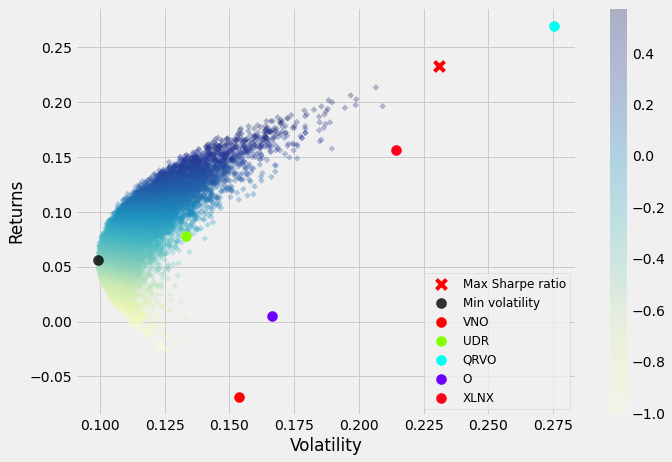

------------------------------
Max Sharpe Ratio Portfolio
Return, vol, Sharpe: 0.23 0.23 0.58
                 VNO        UDR       QRVO         O      XLNX
allocation  0.967364  11.177482  82.533072  3.761419  1.560662
------------------------------
Min Volatility Portfolio
Return, vol, Sharpe: 0.06 0.1 -0.44
                  VNO        UDR      QRVO          O       XLNX
allocation  20.088296  38.481293  2.614542  18.368471  20.447398
------------------------------


In [12]:
avgReturns, covMatrix = returns.mean(), returns.cov()

nbPtf = 10000 ## number of runs
r = 0.1       ## interest rate
plotMarkowitz(returns, avgReturns, covMatrix, nbPtf, r)